# Sales Analysis

Import Necessary Libraries

In [1]:
import pandas as pd

import os

In [ ]:
# Merging 12 months of sales data into a single file


#reading in one file to get a feel for the data
df = pd.read_csv("/Users/dylancorcoran/Library/CloudStorage/OneDrive-Personal/Data Analytics/Projects/Python Sales Analysis 08.11.2022/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_April_2019.csv")

#using os.listdir to retrieve all files in the folder
files = [file for file in os.listdir('/Users/dylancorcoran/Library/CloudStorage/OneDrive-Personal/Data Analytics/Projects/Python Sales Analysis 08.11.2022/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data')]

#creating an empty data frame
all_months_data = pd.DataFrame()

In [ ]:
# using a for loop to concat all the files into a fingle dataframe using the file name + file (defined above)

for file in files:
    df = pd.read_csv('/Users/dylancorcoran/Library/CloudStorage/OneDrive-Personal/Data Analytics/Projects/Python Sales Analysis 08.11.2022/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data' + '/' + file)
    all_months_data = pd.concat([all_months_data, df])
    
#check the output    
all_months_data.head()

In [ ]:
# saving the output into a new csv file

all_months_data.to_csv("all_months_data.csv", index=False)

Read in updated dataframe

In [3]:
df = pd.read_csv('/Users/dylancorcoran/Library/CloudStorage/OneDrive-Personal/Data Analytics/Projects/Python Sales Analysis 08.11.2022/all_months_data.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186849 entries, 0 to 186848
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [4]:
# getting an overview of null values and where they occur

df.isna().sum()

Order ID            544
Product             544
Quantity Ordered    544
Price Each          544
Order Date          544
Purchase Address    544
dtype: int64

In [5]:
#investigating what this looks like using Order ID column label

df[df['Order ID'].isna()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
264,NaN,NaN,NaN,NaN,NaN,NaN
648,NaN,NaN,NaN,NaN,NaN,NaN
680,NaN,NaN,NaN,NaN,NaN,NaN
1385,NaN,NaN,NaN,NaN,NaN,NaN
1495,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185794,NaN,NaN,NaN,NaN,NaN,NaN
185867,NaN,NaN,NaN,NaN,NaN,NaN
185886,NaN,NaN,NaN,NaN,NaN,NaN
185959,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# dropping all 544 rows where all values = NaN - now 186,305 rows

no_na = df.dropna(how='all')

In [7]:
#removing duplicate header rows from merge


no_h_dup = no_na[no_na.Product != 'Product']

In [8]:
# validating the removal of duplication was a success - now only 264 duplicates remain

no_h_dup.duplicated().sum()

264

In [9]:
# examining these duplicate values further

possible_dups = no_h_dup[no_h_dup.duplicated()]

In [17]:
#renaming columns to allow for easier cleaning

no_h_dup.rename(columns={'Order ID': 'Order_ID', 'Product': 'Product', 'Quantity Ordered': 'Qty_Ordered', 'Price Each': 'Price_Each', 'Order Date': 'Order_Date', 'Purchase Address': 'Purchase_Address' }, inplace=True)

In [18]:
# checking out the validity of one of the duplicates 

no_h_dup[no_h_dup.Order_ID == '296081']

,Order_ID,Product,Qty_Ordered,Price_Each,Order_Date,Purchase_Address
439,296081,Flatscreen TV,1,300,12/30/19 16:52,"970 Sunset St, Austin, TX 73301"
440,296081,Flatscreen TV,1,300,12/30/19 16:52,"970 Sunset St, Austin, TX 73301"


In [ ]:
# when I want to see all rows, set this as None

pd.set_option('display.max_rows', None)

In [ ]:
#when I want to limit rows again

pd.set_options.display.max_rows = 15

In [19]:
# removing duplicates from the no_h_dup dataframe - now 185,686 rows - no duplicates & no NaN values

no_dup = no_h_dup.drop_duplicates()

no_dup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185686 entries, 0 to 186848
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order_ID          185686 non-null  object
 1   Product           185686 non-null  object
 2   Qty_Ordered       185686 non-null  object
 3   Price_Each        185686 non-null  object
 4   Order_Date        185686 non-null  object
 5   Purchase_Address  185686 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


In [22]:
# saving the clean output to a new file

no_dup.to_csv("all_months_data_clean.csv", index=False)

### Question 1: What was the best month for sales? What was the total revenue generated for that month?

Augment data with additional columns

In [23]:
#read in clean file

all_data = pd.read_csv('/Users/dylancorcoran/Library/CloudStorage/OneDrive-Personal/Data Analytics/Projects/Python Sales Analysis 08.11.2022/all_months_data_clean.csv')


In [27]:
# Extract month from date column
# Taking the first 2 values from the Order_Date column and adding them to a new column Month
# Then converting this string into an int

all_data['Month'] = all_data['Order_Date'].str[0:2]

all_data['Month'] = all_data['Month'].astype('int32')

all_data.head()

,Order_ID,Product,Qty_Ordered,Price_Each,Order_Date,Purchase_Address,Month
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


In [ ]:
# convert columns to the correct type - using pd.to_numeric

all_data['Quantity_Ordered'] = pd.to_numeric(all_data['Quantity_Ordered'])

all_data['Price_Each'] = pd.to_numeric(all_data['Price_Each'])

In [30]:
# Add a sales colum (qty ordered * price each)

all_data['Sales'] = all_data['Qty_Ordered'] * all_data['Price_Each']

all_data.head()

,Order_ID,Product,Qty_Ordered,Price_Each,Order_Date,Purchase_Address,Month,Sales
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95


In [44]:
# answering the question - grouping by month, sorting desc by Sales

all_data.groupby('Month').sum().sort_values(by=['Sales'], ascending=False)

,Order_ID,Qty_Ordered,Price_Each,Sales
Month,,,,
12,7673646910,28074,4.583268e+06,4.608296e+06
10,5448214091,22669,3.713609e+06,3.734778e+06
4,3383299164,20536,3.366219e+06,3.389218e+06
11,5038923457,19769,3.178873e+06,3.197875e+06
5,3343056791,18653,3.133135e+06,3.150616e+06
3,2560592045,16979,2.789085e+06,2.804973e+06
7,3280010744,16054,2.631225e+06,2.646461e+06
6,2928868159,15234,2.560504e+06,2.576280e+06
8,2894980432,13429,2.226964e+06,2.241083e+06


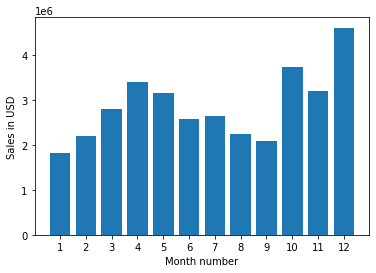

In [46]:
# plotting 

import matplotlib.pyplot as plt

months = range(1,13)

results = all_data.groupby('Month').sum()

plt.bar(months, results['Sales'])

plt.xticks(months)

plt.ylabel('Sales in USD')

plt.xlabel('Month number')


plt.show()

### Question 2: What city had the highest number of sales

In [47]:
all_data.head()

,Order_ID,Product,Qty_Ordered,Price_Each,Order_Date,Purchase_Address,Month,Sales
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95


In [52]:
# create a new column - city - using .apply() method
# .apply() allows us to run many functions on any dataframe

#function takes the first section after the ','
def get_city(address):
    return address.split(',')[1]

# takes the text after the second ',' - use .split() again to return just the state symbols
def get_state(address):
    return address.split(',')[2].split(' ')[1]

all_data['City'] = all_data['Purchase_Address'].apply(lambda x: get_city(x) + '  (' + get_state(x) + ')')


# can also be done by using the code below - no function (just city name)
#all_data['City'] = all_data['Purchase_Address'].apply(lambda x: x.split(',')[1])

all_data.head()

,Order_ID,Product,Qty_Ordered,Price_Each,Order_Date,Purchase_Address,Month,Sales,City
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY)
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY)
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY)
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA)
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA)


In [55]:
# answering question 2

city_sales = all_data.groupby('City').sum()

city_sales

,Order_ID,Qty_Ordered,Price_Each,Month,Sales
City,,,,,
Atlanta (GA),3419484721,16584,2.778609e+06,104649,2.794199e+06
Austin (TX),2277506240,11137,1.808340e+06,69720,1.818044e+06
Boston (MA),4590961337,22494,3.634398e+06,140898,3.658628e+06
Dallas (TX),3410206282,16707,2.750026e+06,104447,2.765374e+06
Los Angeles (CA),6801454376,33247,5.417172e+06,208020,5.448304e+06
New York City (NY),5729940452,27903,4.632921e+06,175557,4.661867e+06
Portland (ME),562382774,2746,4.467524e+05,17119,4.493214e+05
Portland (OR),2302544477,11291,1.859836e+06,70517,1.870011e+06
San Francisco (CA),10287205330,50169,8.204001e+06,314949,8.254744e+06


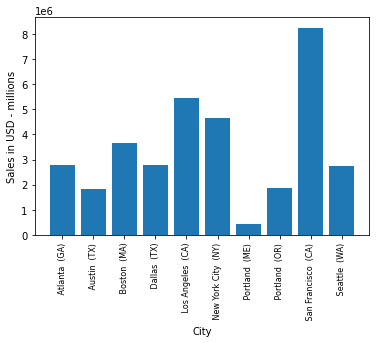

In [65]:
# plotting 

import matplotlib.pyplot as plt

# our cities need to be in the same order as our output or the graph will display incorrect data
cities = [city for city, df in all_data.groupby('City')]

plt.bar(cities, city_sales['Sales'])

plt.xticks(cities, rotation='vertical', size=8)

plt.ylabel('Sales in USD - millions')

plt.xlabel('City')


plt.show()

### Question 3: What time should we display advertisements to maximise the likelihood of customers buying products?

In [69]:
# convert Order_Date column into a datetime object

all_data['Order_Date'] = pd.to_datetime(all_data['Order_Date'])

all_data.head()

,Order_ID,Product,Qty_Ordered,Price_Each,Order_Date,Purchase_Address,Month,Sales,City
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY)
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY)
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY)
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA)
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA)


In [73]:
# adding an Hour & Minute columns to our data

all_data['Hour'] = all_data['Order_Date'].dt.hour

all_data['Minute'] = all_data['Order_Date'].dt.minute

all_data.head()

,Order_ID,Product,Qty_Ordered,Price_Each,Order_Date,Purchase_Address,Month,Sales,City,Hour,Minute
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY),0,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY),7,3
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY),18,21
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA),15,13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA),12,38


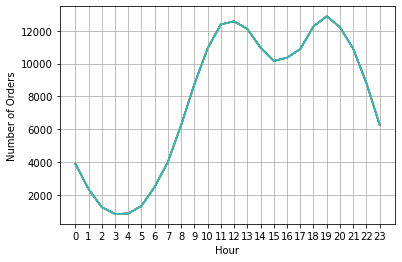

In [80]:
hours = [hour for hour, df in all_data.groupby('Hour')]

# counts all orders for each Hour, then plots it on a line chart
plt.plot(hours, all_data.groupby(['Hour']).count())

plt.xticks(hours)

plt.xlabel('Hour')

plt.ylabel('Number of Orders')

plt.grid()


plt.show()

# our plot shows us that between the times of 11-13:00 & 18-20:00 are the best times for displaying advertisements, as total sales peaked during these hours

### Question 4: What products are most often sold together?

In [82]:
all_data.head()

,Order_ID,Product,Qty_Ordered,Price_Each,Order_Date,Purchase_Address,Month,Sales,City,Hour,Minute
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY),0,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY),7,3
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY),18,21
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA),15,13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA),12,38


In [84]:
# counting the duplicate order id's - which products were sold together the most

# first we isolate the duplicate values into a new df

df = all_data[all_data['Order_ID'].duplicated(keep=False)]

df.head()

,Order_ID,Product,Qty_Ordered,Price_Each,Order_Date,Purchase_Address,Month,Sales,City,Hour,Minute
16,295681,Google Phone,1,600.00,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,600.00,Boston (MA),12,37
17,295681,USB-C Charging Cable,1,11.95,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,11.95,Boston (MA),12,37
18,295681,Bose SoundSport Headphones,1,99.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,99.99,Boston (MA),12,37
19,295681,Wired Headphones,1,11.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,11.99,Boston (MA),12,37
36,295698,Vareebadd Phone,1,400.00,2019-12-13 14:32:00,"175 1st St, New York City, NY 10001",12,400.00,New York City (NY),14,32


In [85]:
# grouping these duplicates togther
# create a new column with both products on the same line 

df['Grouped'] = df.groupby('Order_ID')['Product'].transform(lambda x: ','.join(x))

df.head()

<ipython-input-85-c5cc39a042f7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order_ID')['Product'].transform(lambda x: ','.join(x))


,Order_ID,Product,Qty_Ordered,Price_Each,Order_Date,Purchase_Address,Month,Sales,City,Hour,Minute,Grouped
16,295681,Google Phone,1,600.00,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,600.00,Boston (MA),12,37,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
17,295681,USB-C Charging Cable,1,11.95,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,11.95,Boston (MA),12,37,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
18,295681,Bose SoundSport Headphones,1,99.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,99.99,Boston (MA),12,37,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
19,295681,Wired Headphones,1,11.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,11.99,Boston (MA),12,37,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,Vareebadd Phone,1,400.00,2019-12-13 14:32:00,"175 1st St, New York City, NY 10001",12,400.00,New York City (NY),14,32,"Vareebadd Phone,USB-C Charging Cable"


In [86]:
# dropping duplicates

df = df[['Order_ID', 'Grouped']].drop_duplicates()

df.head()

,Order_ID,Grouped
16,295681,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,"Vareebadd Phone,USB-C Charging Cable"
42,295703,"AA Batteries (4-pack),Bose SoundSport Headphones"
66,295726,"iPhone,Lightning Charging Cable"
76,295735,"iPhone,Apple Airpods Headphones,Wired Headphones"


In [88]:
# iterate over the rows and count the pairs

from itertools import combinations
from collections import Counter


count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1002),
 (('Google Phone', 'USB-C Charging Cable'), 985),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 413),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 159),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

### Question 5: What product sold the most? Why could this be the case?

In [104]:
# sum the qty ordered, group by product

product_group = all_data.groupby('Product')

#below we are taking a slice, just displaying the product & total qty columns
quantity_ordered = product_group.sum()['Qty_Ordered']

quantity_ordered

Product
20in Monitor                   4126
27in 4K Gaming Monitor         6239
27in FHD Monitor               7541
34in Ultrawide Monitor         6192
AA Batteries (4-pack)         27615
AAA Batteries (4-pack)        30986
Apple Airpods Headphones      15637
Bose SoundSport Headphones    13430
Flatscreen TV                  4813
Google Phone                   5529
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23169
Macbook Pro Laptop             4725
ThinkPad Laptop                4128
USB-C Charging Cable          23931
Vareebadd Phone                2068
Wired Headphones              20524
iPhone                         6847
Name: Qty_Ordered, dtype: int64

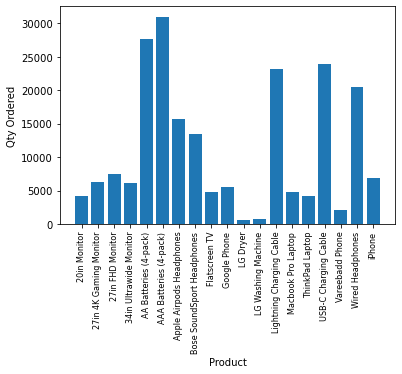

In [111]:
# displaying the data on a plot

products = [product for product, df in product_group]

plt.bar(products, quantity_ordered)

plt.xticks(products, rotation='vertical', size=8)

plt.ylabel('Qty Ordered')

plt.xlabel('Product')

plt.show()

In [112]:
# hypothesis: items with the highest no. of sales = cheaper

# approach: overlay price data on above chart - add 2nd y axis

prices = all_data.groupby('Product').mean()['Price_Each']

print(prices)

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price_Each, dtype: float64


<ipython-input-121-843c9a611d95>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical', size=8)


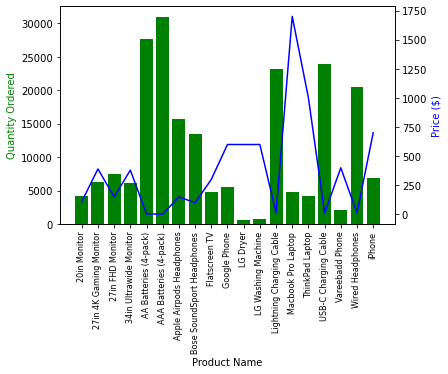

In [121]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.bar(products, quantity_ordered, color='g')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')

ax1.set_xticklabels(products, rotation='vertical', size=8)

plt.show()